In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
from torchvision import datasets, transforms
from sklearn.manifold import TSNE

In [2]:
train_data = datasets.MNIST('data', train=True, download="True", transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download="True", transform=transforms.ToTensor())

In [3]:
def split_data(data):
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    return x, y

In [4]:
def convert_to_numpy(x):
    for i in range (len(x)):
        x[i] = x[i].numpy()
        x[i] = x[i].reshape(28 * 28)
    return x

In [5]:
train_x, train_y = split_data(train_data)
test_x, test_y = split_data(test_data)

In [6]:
train_x = convert_to_numpy(train_x)
test_x = convert_to_numpy(test_x)
train_y = np.array(train_y)
test_y = np.array(test_y)

In [7]:
train_x_embedded = TSNE(n_components=2).fit_transform(train_x)
train_x_embedded.shape

(60000, 2)

<AxesSubplot:xlabel='x1', ylabel='x2'>

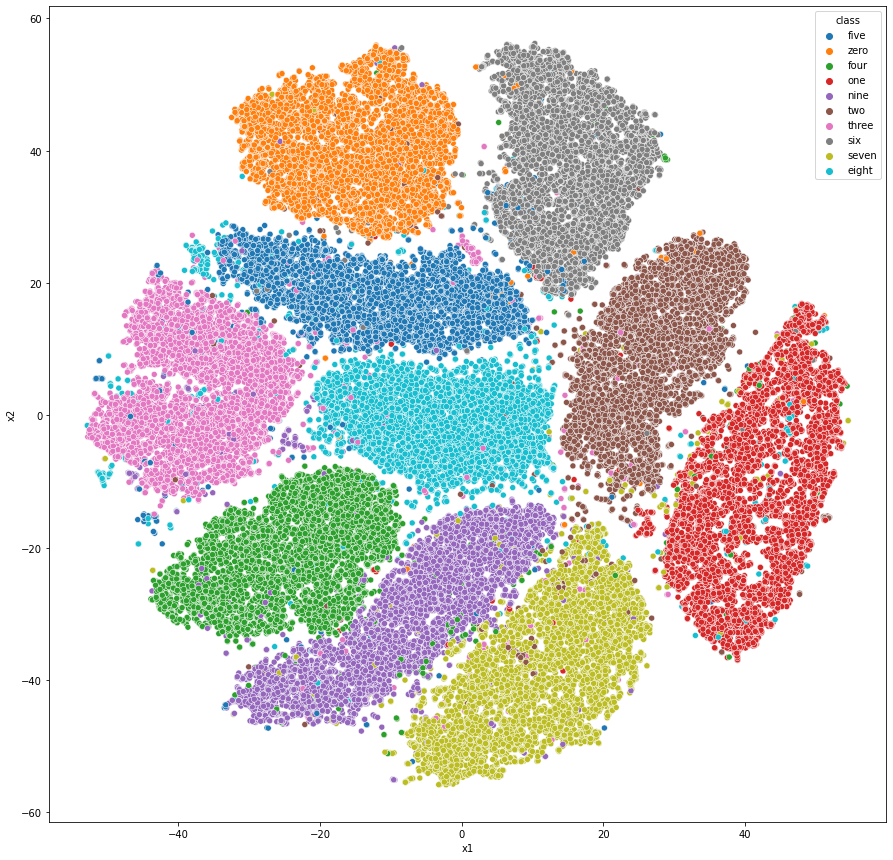

In [8]:
plt.rcParams['figure.figsize'] = (15, 15)

data = np.concatenate([train_x_embedded, train_y.reshape(-1, 1)], axis=1)

df = pd.DataFrame(data=data, columns=["x1", 'x2', 'class'])

df.loc[df['class'] == 0, 'class'] = 'zero'
df.loc[df['class'] == 1, 'class'] = 'one'
df.loc[df['class'] == 2, 'class'] = 'two'
df.loc[df['class'] == 3, 'class'] = 'three'
df.loc[df['class'] == 4, 'class'] = 'four'
df.loc[df['class'] == 5, 'class'] = 'five'
df.loc[df['class'] == 6, 'class'] = 'six'
df.loc[df['class'] == 7, 'class'] = 'seven'
df.loc[df['class'] == 8, 'class'] = 'eight'
df.loc[df['class'] == 9, 'class'] = 'nine'

sns.scatterplot(data=df, x="x1", y="x2", hue="class")